<a href="https://colab.research.google.com/github/AleGF83/AleGF83/blob/main/Proyecto_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #importamos la libreria Seaborn para los graficos Scatter

import math
import scipy.stats as ss
equipostotal = pd.read_excel("/content/ClubesEstadistica.xlsx")

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
# Visualizamos que se haya cargado bien el archivo excel al DataFrame
equipostotal.head()

,Club,Equipos,Categoria,Division,Posicion Ranking,Total equipos por Club,Total jugadoras fem Club,Total hs entrenamiento por semana,Equipo Senior en Liga profesional?,Cantidad Equipos profesionales
0,BARÇA,BARÇA CVB,Cad/Juv,1.0,1.0,17.0,201.0,9.0,si,2.0
1,VALL D'HEBRON,CV VALL D'HEBRON,Cad/Juv,1.0,2.0,20.0,238.0,7.5,si,1.0
2,SANT CUGAT,DSV CV SANT CUGAT,Cad/Juv,1.0,3.0,25.0,277.0,9.0,si,2.0
3,VOLEI SANT JUST,VOLEI SANT JUST,Cad/Juv,1.0,4.0,12.0,125.0,10.5,si,1.0
4,SANT QUIRZE,CV SANT QUIRZE,Cad/Juv,1.0,5.0,12.0,124.0,8.0,no,0.0


In [ ]:
# Hay 122 equipos en la categoria Cadete/Juvenil de Catalunya divididos en 3 divisiones
# no quiere decir Clubes porque como vemos hay muchos repetidos (freq)
equipostotal["Club"].describe()

count            122
unique            84
top       SANT CUGAT
freq               5
Name: Club, dtype: object

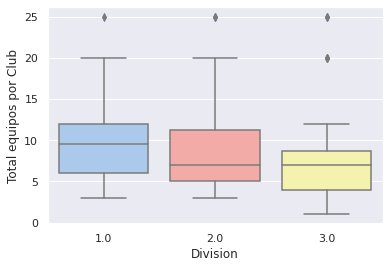

In [ ]:
# Visualizamos el archivo de TOTAL EQUIPOS 
# Y visualizamos el BOXPLOT de la media, los quartiles, los valores max y minimos por division 
#(de todos los equipos de 1ra, 2da y 3ra)

sns.set_theme(style="ticks", palette="pastel")
sns.set_style("darkgrid")  #cambia el fondo con un estilo
sns.boxplot(x=equipostotal["Division"], y=equipostotal["Total equipos por Club"], palette=["b", "r","y"],data=equipostotal)
plt.savefig("boxplot_totalequipos") # Salvamos la imagen de la visualizacion en un archivo png

In [ ]:
# Con esta funcion eliminamos los equipos que tienen los CLUBES como equipos B, C, D, etc (o nombrados por colores)
clubespob=equipostotal.drop_duplicates(subset=["Club"],keep="first")

# Aca vemos que la cantidad de CLUBES de la poblacion que hay en la categoria Cadete/Juvenil
clubespob["Club"].describe()

count        84
unique       84
top       BARÇA
freq          1
Name: Club, dtype: object

In [ ]:
# Ahora eliminamos los clubes que no pertenecen a la muestra (los de 3ra division)
clubes= clubespob[clubespob["Division"]<3]

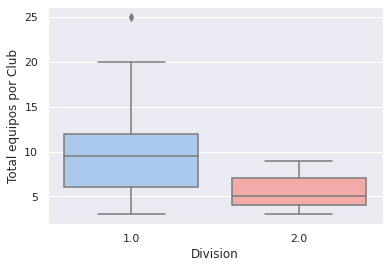

In [ ]:
# Visualizamos el boxplot con seaborn comparando las medias y cuartiles sobre el Total equipos por Club
sns.set_theme(style="ticks", palette="pastel")
sns.set_style("darkgrid")
sns.boxplot(x=clubes["Division"], y=clubes["Total equipos por Club"], palette=["b", "r"],data=clubes)
plt.savefig("boxplot_totalequiposporclub") # Salvamos la imagen de la visualizacion en un archivo png

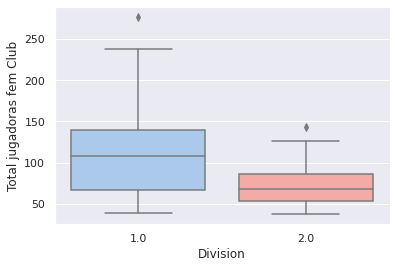

In [ ]:
# Visualizamos ahora solamente los CLUBES, sin los equipos duplicados que habian anteriormente con los datos de TOTAL JUGADORAS FEM CLUB
# boxplot con libreria Seaborn para poder comparar mas datos al mismo tiempo
sns.set_theme(style="ticks", palette="pastel")
sns.set_style("darkgrid")
sns.boxplot(x=clubes["Division"], y=clubes["Total jugadoras fem Club"], palette=["b", "r"],data=clubes)
plt.savefig("boxplot_totaljugadorasporclub")  # Salvamos la imagen de la visualizacion en un archivo png

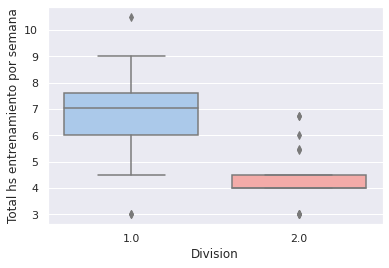

In [ ]:
# Visualizamos el boxplot con seaborn comparando las medias y cuartiles sobre el Total hs entrenamiento por semana
sns.set_theme(style="ticks", palette="pastel")
sns.set_style("darkgrid")
sns.boxplot(x=clubes["Division"], y=clubes["Total hs entrenamiento por semana"], palette=["b", "r"],data=clubes)
plt.savefig("boxplot_totalhorasentrenamientoclub") # Salvamos la imagen de la visualizacion en un archivo png

In [ ]:
# ahora separamos los clubes de 1ra y de 2da
clubesprimera=clubes[clubes["Division"]==1]

clubessegunda=clubes[clubes["Division"]==2]

In [ ]:
# Aca anlizamos los datos mas relevantes de las diferentes columnas de 1ra
clubesprimera['Total equipos por Club'].describe()

count    20.000000
mean     10.400000
std       5.344944
min       3.000000
25%       6.000000
50%       9.500000
75%      12.000000
max      25.000000
Name: Total equipos por Club, dtype: float64

In [ ]:
# Vamos a calcular el rango de las variables de 1ra y 2da

max_equipos_1ra = clubesprimera["Total equipos por Club"].max()
min_equipos_1ra = clubesprimera["Total equipos por Club"].min()
max_equipos_2da = clubessegunda["Total equipos por Club"].max()
min_equipos_2da = clubessegunda["Total equipos por Club"].min()
rango_1ra_equipos = max_equipos_1ra - min_equipos_1ra
rango_2da_equipos = max_equipos_2da - min_equipos_2da
print(f"El rango para los clubes de 1ra de la variable Total equipos por club es de {rango_1ra_equipos} equipos")
print(f"El rango para los clubes de 2daa de la variable Total equipos por club es de {rango_2da_equipos} equipos\n")

max_jugadoras_1ra = clubesprimera["Total jugadoras fem Club"].max()
max_jugadoras_2da = clubessegunda["Total jugadoras fem Club"].max()
min_jugadoras_1ra = clubesprimera["Total jugadoras fem Club"].min()
min_jugadoras_2da = clubessegunda["Total jugadoras fem Club"].min()
rango_1ra_jugadoras = max_jugadoras_1ra - min_jugadoras_2da
rango_2da_jugadoras = max_jugadoras_2da - min_jugadoras_2da
print(f"El rango para los clubes de 1ra de la variable Total jugadoras fem por club es de {rango_1ra_jugadoras} jugadoras")
print(f"El rango para los clubes de 2daa de la variable Total jugadoras fem club es de {rango_2da_jugadoras} jugadoras\n")

max_hsentren_1ra = clubesprimera["Total hs entrenamiento por semana"].max()
max_hsentren_2da = clubessegunda["Total hs entrenamiento por semana"].max()
min_hsentren_1ra = clubesprimera["Total hs entrenamiento por semana"].min()
min_hsentren_2da = clubessegunda["Total hs entrenamiento por semana"].min()
rango_1ra_hsentren = max_hsentren_1ra - min_hsentren_1ra
rango_2da_hsentren = max_hsentren_2da - min_hsentren_2da

print(f"El rango para los clubes de 1ra de la variable Total horas de entrenamiento por club es de {rango_1ra_hsentren} horas")
print(f"El rango para los clubes de 2da de la variable Total horas de entrenamiento por club es de {rango_2da_hsentren} horas")


El rango para los clubes de 1ra de la variable Total equipos por club es de 22.0 equipos
El rango para los clubes de 2daa de la variable Total equipos por club es de 6.0 equipos

El rango para los clubes de 1ra de la variable Total jugadoras fem por club es de 240.0 jugadoras
El rango para los clubes de 2daa de la variable Total jugadoras fem club es de 106.0 jugadoras

El rango para los clubes de 1ra de la variable Total horas de entrenamiento por club es de 7.5 horas
El rango para los clubes de 2da de la variable Total horas de entrenamiento por club es de 3.75 horas


In [ ]:
# ahora analizamos de la variable "Total equipos por Club" los diferentes cuartiles y la media para almacenarlo en variables
q1_equiposxclub_1ra = round(clubesprimera['Total equipos por Club'].quantile(0.25))
media_equiposxclub_1ra= q2_equiposxclub_1ra = round(clubesprimera['Total equipos por Club'].quantile(0.50))
q3_equiposxclub_1ra = round(clubesprimera['Total equipos por Club'].quantile(0.75))


print(f"Los clubes de 1ra division que tienen hasta {q1_equiposxclub_1ra} equipos estan dentro del primer cuartil,\nlos que tienen hasta {q2_equiposxclub_1ra} equipos se encuentran en la media (o el 2do cuartil),\nY los que tienen hasta {q3_equiposxclub_1ra} equipos se encuentran en el 3er cuartil.")

Los clubes de 1ra division que tienen hasta 6 equipos estan dentro del primer cuartil,
los que tienen hasta 10 equipos se encuentran en la media (o el 2do cuartil),
Y los que tienen hasta 12 equipos se encuentran en el 3er cuartil.


In [ ]:
clubesprimera['Total jugadoras fem Club'].describe() 

count     20.000000
mean     119.800000
std       62.545646
min       39.000000
25%       66.250000
50%      108.000000
75%      139.500000
max      277.000000
Name: Total jugadoras fem Club, dtype: float64

In [ ]:
# ahora analizamos de la variable "Total jugadoras fem Club" los diferentes cuartiles y la media para almacenarlo en variables
q1_jugadorasxclub_1ra = round(clubesprimera['Total jugadoras fem Club'].quantile(0.25))
media_jugadorasxclub_1ra = q2_jugadorasxclub_1ra = round(clubesprimera['Total jugadoras fem Club'].quantile(0.50))
q3_jugadorasxclub_1ra = round(clubesprimera['Total jugadoras fem Club'].quantile(0.75))
print(f"los clubes de 1ra division que tienen hasta {q1_jugadorasxclub_1ra} jugadoras estan dentro del 1er cuartil,\nLos que tienen hasta {q2_jugadorasxclub_1ra} jugadoras estan en la media,\nY los que tienen {q3_jugadorasxclub_1ra} jugadoras estan dentro del 75% de los clubes de 1ra (o 3er cuartil)")

los clubes de 1ra division que tienen hasta 66 jugadoras estan dentro del 1er cuartil,
Los que tienen hasta 108 jugadoras estan en la media,
Y los que tienen 140 jugadoras estan dentro del 75% de los clubes de 1ra (o 3er cuartil)


In [ ]:
clubesprimera["Total hs entrenamiento por semana"].describe() 

count    20.000000
mean      6.777500
std       1.888851
min       3.000000
25%       6.000000
50%       7.025000
75%       7.625000
max      10.500000
Name: Total hs entrenamiento por semana, dtype: float64

In [ ]:
# ahora analizamos de la variable "Total hs de entrenamiento por semana" los diferentes cuartiles y la media para almacenarlo en variables
q1_hsentrenxclub_1ra = clubesprimera['Total hs entrenamiento por semana'].quantile(0.25)
media_hsentrenxclub_1ra = q2_hsentrenxclub_1ra = clubesprimera['Total hs entrenamiento por semana'].quantile(0.50)
q3_hsentrenxclub_1ra = clubesprimera['Total hs entrenamiento por semana'].quantile(0.75)
print(f"los clubes de 1ra division que tienen hasta {q1_hsentrenxclub_1ra} horas de entrenamiento por semana estan dentro del 1er cuartil,\nLos que tienen hasta {q2_hsentrenxclub_1ra} horas de entrenamiento estan en la media,\nY los que tienen {q3_hsentrenxclub_1ra} horas de entrenamiento estan dentro del 75% de los clubes de 1ra (o 3er cuartil)")

los clubes de 1ra division que tienen hasta 6.0 horas de entrenamiento por semana estan dentro del 1er cuartil,
Los que tienen hasta 7.025 horas de entrenamiento estan en la media,
Y los que tienen 7.625 horas de entrenamiento estan dentro del 75% de los clubes de 1ra (o 3er cuartil)


In [ ]:
# Ahora visualizamos los nombres de los clubes de 1ra division que cumplen con las 3 variables estar en el Q3

q3_clubes1ra_equipo= clubesprimera[clubesprimera["Total equipos por Club"]> q3_equiposxclub_1ra]
print("Ahora los clubes que estan por encima del Q3 en equipos por club son: \n",q3_clubes1ra_equipo["Club"])

q3_clubes1ra_jugadoras= clubesprimera[clubesprimera["Total jugadoras fem Club"]> q3_jugadorasxclub_1ra]
print("\nAhora los clubes que estan por encima del Q3 en jugadoras femenino por club son: \n",q3_clubes1ra_jugadoras["Club"])

q3_clubes1ra_hsentren = clubesprimera[clubesprimera["Total hs entrenamiento por semana"]>q3_hsentrenxclub_1ra]
print("\nAhora los clubes que estan por encima del Q3 en horas de entrenamiento por club son: \n",q3_clubes1ra_hsentren["Club"])

Ahora los clubes que estan por encima del Q3 en equipos por club son: 
 0            BARÇA
1    VALL D'HEBRON
2       SANT CUGAT
Name: Club, dtype: object

Ahora los clubes que estan por encima del Q3 en jugadoras femenino por club son: 
 0              BARÇA
1      VALL D'HEBRON
2         SANT CUGAT
6          ESPLUGUES
7    CARLES VALLBONA
Name: Club, dtype: object

Ahora los clubes que estan por encima del Q3 en horas de entrenamiento por club son: 
 0              BARÇA
2         SANT CUGAT
3    VOLEI SANT JUST
4        SANT QUIRZE
9    VILASSAR DE MAR
Name: Club, dtype: object


In [ ]:
# Aca anlizamos los datos mas relevantes de las diferentes columnas de 2da
clubessegunda['Total equipos por Club'].describe()

count    21.000000
mean      5.619048
std       1.657594
min       3.000000
25%       4.000000
50%       5.000000
75%       7.000000
max       9.000000
Name: Total equipos por Club, dtype: float64

In [ ]:
# Hacemos lo mismo pero para los de 2da division
q1_equiposxclub_2da = round(clubessegunda['Total equipos por Club'].quantile(0.25))
media_equiposxclub_2da = q2_equiposxclub_2da = round(clubessegunda['Total equipos por Club'].quantile(0.50))
q3_equiposxclub_2da = round(clubessegunda['Total equipos por Club'].quantile(0.75))

print(f"Los clubes de 2da divisioin que tienen hasta {q1_equiposxclub_1ra} equipos estan dentro del primer cuartil,\nlos que tienen hasta {q2_equiposxclub_1ra} equipos se encuentran en la media (o el 2do cuartil),\nY los que tienen hasta {q3_equiposxclub_1ra} equipos se encuentran en el 3er cuartil.")

Los clubes de 2da divisioin que tienen hasta 6 equipos estan dentro del primer cuartil,
los que tienen hasta 10 equipos se encuentran en la media (o el 2do cuartil),
Y los que tienen hasta 12 equipos se encuentran en el 3er cuartil.


In [ ]:
clubessegunda['Total jugadoras fem Club'].describe() 

count     21.000000
mean      74.714286
std       29.158434
min       37.000000
25%       53.000000
50%       68.000000
75%       86.000000
max      143.000000
Name: Total jugadoras fem Club, dtype: float64

In [ ]:
q1_jugadorasxclub_2da = round(clubessegunda['Total jugadoras fem Club'].quantile(0.25))
media_jugadorasxclub_2da =q2_jugadorasxclub_2da = round(clubessegunda['Total jugadoras fem Club'].quantile(0.50))
q3_jugadorasxclub_2da = round(clubessegunda['Total jugadoras fem Club'].quantile(0.75))
print(f"los clubes de 2da division que tienen hasta {q1_jugadorasxclub_1ra} jugadoras estan dentro del 1er cuartil,\nLos que tienen hasta {q2_jugadorasxclub_1ra} jugadoras estan en la media,\nY los que tienen {q3_jugadorasxclub_1ra} jugadoras estan dentro del 75% de los clubes de 1ra (o 3er cuartil)")

los clubes de 2da division que tienen hasta 66 jugadoras estan dentro del 1er cuartil,
Los que tienen hasta 108 jugadoras estan en la media,
Y los que tienen 140 jugadoras estan dentro del 75% de los clubes de 1ra (o 3er cuartil)


In [ ]:
clubessegunda['Total hs entrenamiento por semana'].describe()


count    21.000000
mean      4.402381
std       1.119763
min       3.000000
25%       4.000000
50%       4.000000
75%       4.500000
max       6.750000
Name: Total hs entrenamiento por semana, dtype: float64

In [ ]:
q1_hsentrenxclub_2da = clubessegunda['Total hs entrenamiento por semana'].quantile(0.25)
media_hsentrenxclub_2da = q2_hsentrenxclub_2da = clubessegunda['Total hs entrenamiento por semana'].quantile(0.50)
q3_hsentrenxclub_2da = clubessegunda['Total hs entrenamiento por semana'].quantile(0.75)
print(f"los clubes de 2da division que tienen hasta {q1_hsentrenxclub_1ra} horas de entrenamiento por semana estan dentro del 1er cuartil,\nLos que tienen hasta {q2_hsentrenxclub_1ra} horas de entrenamiento estan en la media,\nY los que tienen {q3_hsentrenxclub_1ra} horas de entrenamiento estan dentro del 75% de los clubes de 1ra (o 3er cuartil)")

los clubes de 2da division que tienen hasta 6.0 horas de entrenamiento por semana estan dentro del 1er cuartil,
Los que tienen hasta 7.025 horas de entrenamiento estan en la media,
Y los que tienen 7.625 horas de entrenamiento estan dentro del 75% de los clubes de 1ra (o 3er cuartil)


In [ ]:
# Ahora visualizamos los nombres de los clubes de 2da que cumplen con las 3 variables estar en el Q3

q3_clubes2da_equipo= clubessegunda[clubessegunda["Total equipos por Club"]> q3_equiposxclub_2da]
print("Ahora los clubes que estan por encima del Q3 en equipos por club son: \n",q3_clubes2da_equipo["Club"])

q3_clubes2da_jugadoras= clubessegunda[clubessegunda["Total jugadoras fem Club"]> q3_jugadorasxclub_2da]
print("\nAhora los clubes que estan por encima del Q3 en jugadoras femenino por club son: \n",q3_clubes2da_jugadoras["Club"])

q3_clubes2da_hsentren = clubessegunda[clubessegunda["Total hs entrenamiento por semana"]>q3_hsentrenxclub_2da]
print("\nAhora los clubes que estan por encima del Q3 en horas de entrenamiento por club son: \n",q3_clubes2da_hsentren["Club"])

Ahora los clubes que estan por encima del Q3 en equipos por club son: 
 25                  GAVA
28    SURIS VOLEI MOLINS
33           AVAP GIRONA
45              ELS ARCS
Name: Club, dtype: object

Ahora los clubes que estan por encima del Q3 en jugadoras femenino por club son: 
 25                          GAVA
28            SURIS VOLEI MOLINS
33                   AVAP GIRONA
45                      ELS ARCS
46    INSTITUT MONTSERRAT GRACIA
Name: Club, dtype: object

Ahora los clubes que estan por encima del Q3 en horas de entrenamiento por club son: 
 26              SAFA GAVA
28     SURIS VOLEI MOLINS
32     VOLEI SANT FRUITOS
37    PREMIA DE MAR ASSIS
50                   RUBI
Name: Club, dtype: object


In [ ]:
# ahora analizaremos los clubes de 2da con la media de los de 1ra division
# para saber si algun club podria alcanzar a estar entre el ranking del 1 al 10

club2da_equipos = clubessegunda[clubessegunda["Total equipos por Club"]>media_equiposxclub_1ra]
club2da_jugadoras = clubessegunda[clubessegunda["Total jugadoras fem Club"]>media_jugadorasxclub_1ra]
club2da_hsentren = clubessegunda[clubessegunda["Total hs entrenamiento por semana"]>media_hsentrenxclub_1ra]

print("Los clubes de 2da que se encuentran por la media de total equipos por club de 1ra son:\n",club2da_equipos["Club"],)
print("\nLos clubes de 2da que se encuentran por la media de total jugadoras femeninas por club de 1ra son:\n",club2da_jugadoras["Club"])
print("\nLos clubes de 2da que se encuentran por la media de Total hs entrenamiento por semana por club de 1ra son:\n",club2da_hsentren["Club"])

Los clubes de 2da que se encuentran por la media de total equipos por club de 1ra son:
 Series([], Name: Club, dtype: object)

Los clubes de 2da que se encuentran por la media de total jugadoras femeninas por club de 1ra son:
 25                          GAVA
33                   AVAP GIRONA
45                      ELS ARCS
46    INSTITUT MONTSERRAT GRACIA
Name: Club, dtype: object

Los clubes de 2da que se encuentran por la media de Total hs entrenamiento por semana por club de 1ra son:
 Series([], Name: Club, dtype: object)


In [ ]:
# Calculamos la varianza de cada variable dividido por division
varianza_1ra_equipos = clubes["Total equipos por Club"].var()
varianza_2da_equipos = clubessegunda["Total equipos por Club"].var()
print(f"El total de equipos por club de 1ra presentan una varianza de {round(varianza_1ra_equipos)}")
print(f"El total de equipos por club de 2da presentan una varianza de {round(varianza_2da_equipos)}\n")

varianza_1ra_jugadoras = clubesprimera["Total jugadoras fem Club"].var()
varianza_2da_jugadoras = clubessegunda["Total jugadoras fem Club"].var()
print(f"El total de jugadoras femeninas por club de 1ra presentan una varianza de {round(varianza_1ra_jugadoras)}")
print(f"El total de jugadoras femeninas por club de 2da presentan una varianza de {round(varianza_2da_jugadoras)}]n")

varianza_1ra_hsentren = clubesprimera["Total hs entrenamiento por semana"].var()
varianza_2da_hsentren = clubessegunda["Total hs entrenamiento por semana"].var()
print(f"Las horas de entrenamiento por semana por club de 1ra presentan una varianza de {varianza_1ra_hsentren}")
print(f"Las horas de entrenamiento por semana por club de 2da presentan una varianza de {varianza_2da_hsentren}")

El total de equipos por club de 1ra presentan una varianza de 21
El total de equipos por club de 2da presentan una varianza de 3

El total de jugadoras femeninas por club de 1ra presentan una varianza de 3912
El total de jugadoras femeninas por club de 2da presentan una varianza de 850]n
Las horas de entrenamiento por semana por club de 1ra presentan una varianza de 3.5677565789473684
Las horas de entrenamiento por semana por club de 2da presentan una varianza de 1.253869047619048


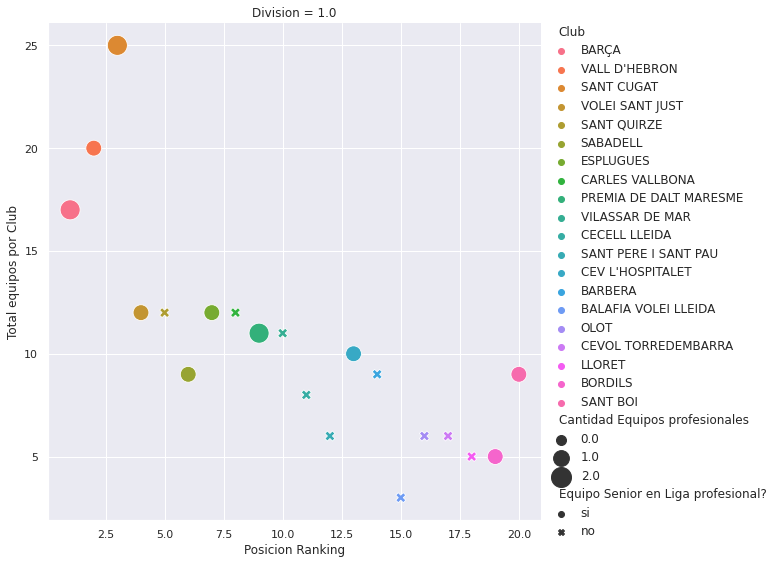

In [ ]:
# Graficos de Scatterplot donde se comparar la cantidad de equipos por Club con el Posicion Ranking.
# Ademas se diferencia visualmente los clubes con equipos Profesionales y la cantidad del mismo con un diferente diseño y tamaño.

sns.relplot(
    data=clubesprimera, x=clubesprimera["Posicion Ranking"], y=clubesprimera["Total equipos por Club"],kind="scatter",
    col=clubesprimera["Division"],hue=clubesprimera["Club"],style=clubesprimera["Equipo Senior en Liga profesional?"], # agregamos un estilo para diferenciar los clubes que tienen Equipo Senior Profesional
    size=clubesprimera["Cantidad Equipos profesionales"],sizes=(100,400),height=8) # agregamos una diferencia visual al hacer mas grandes los puntos de los equipos que tienen mas equipos Profesionales 
sns.color_palette("icefire", as_cmap=True) #agregamos una paletta de colores mas variada
plt.savefig("totalequipos_posranking_1ra.png")  # Salvamos la imagen de la visualizacion en un archivo png

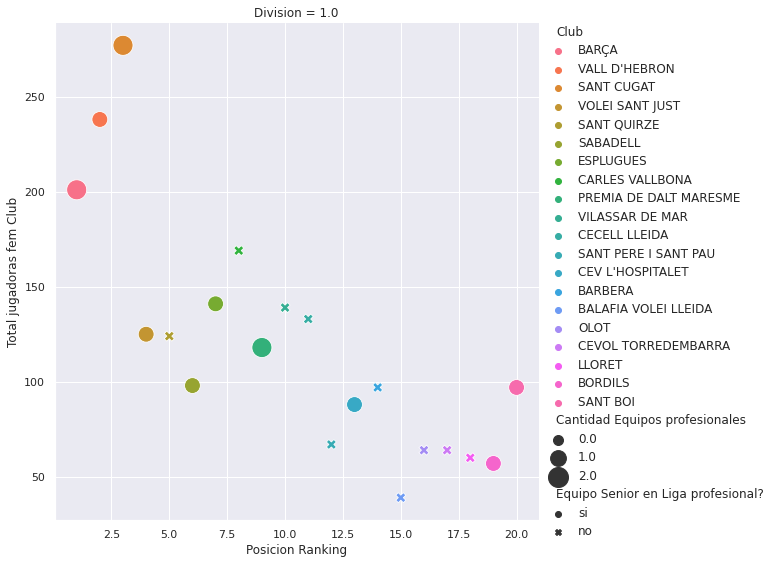

In [ ]:
sns.relplot(
    data=clubesprimera, x=clubesprimera["Posicion Ranking"], y=clubesprimera["Total jugadoras fem Club"],kind="scatter",
    col=clubesprimera["Division"],hue=clubesprimera["Club"],style=clubesprimera["Equipo Senior en Liga profesional?"], # agregamos un estilo para diferenciar los clubes que tienen Equipo Senior Profesional
    size=clubesprimera["Cantidad Equipos profesionales"],sizes=(100,400),height=8) # agregamos una diferencia visual al hacer mas grandes los puntos de los equipos que tienen mas equipos Profesionales 
sns.color_palette("icefire", as_cmap=True) #agregamos una paletta de colores mas variada
plt.savefig("totaljugadorasfemxclub_posranking_1ra.png")  # Salvamos la imagen de la visualizacion en un archivo png

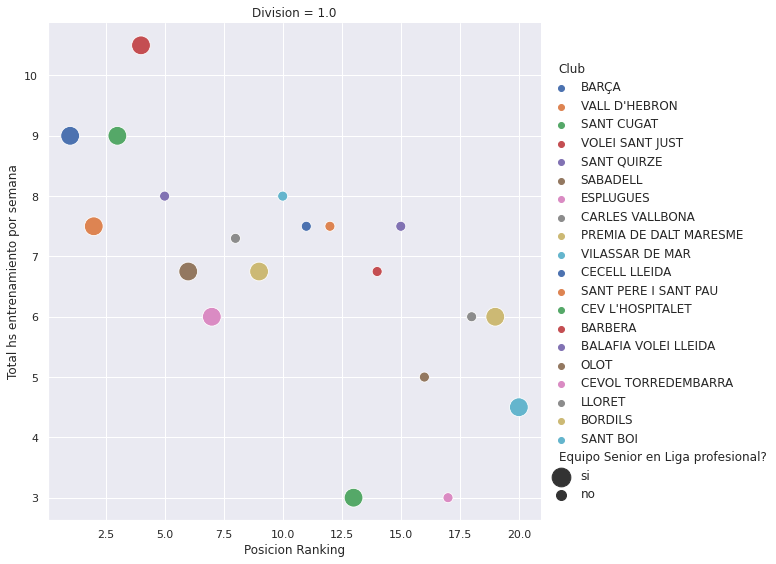

In [ ]:
# Grafico donde se divide se compara la posicion del ranking del club con las horas de entrenamiento
# Ademas le agregamos visualmente se puede diferenciar los Clubes que tienen los equipos Senior jugando en equipos profesiones

sns.relplot(
    data=clubesprimera, x=clubesprimera["Posicion Ranking"], y=clubesprimera["Total hs entrenamiento por semana"],kind="scatter",
    col=clubesprimera["Division"], hue=clubesprimera["Club"],
    palette="deep",size=clubesprimera["Equipo Senior en Liga profesional?"],sizes=(100,350),hue_norm=(2, 100),height=8)
sns.color_palette("icefire", as_cmap=True) #agregamos una paletta de colores mas variada
plt.savefig("horas_entrenamiento_posranking_1ra.png") # Salvamos la imagen de la visualizacion en un archivo png

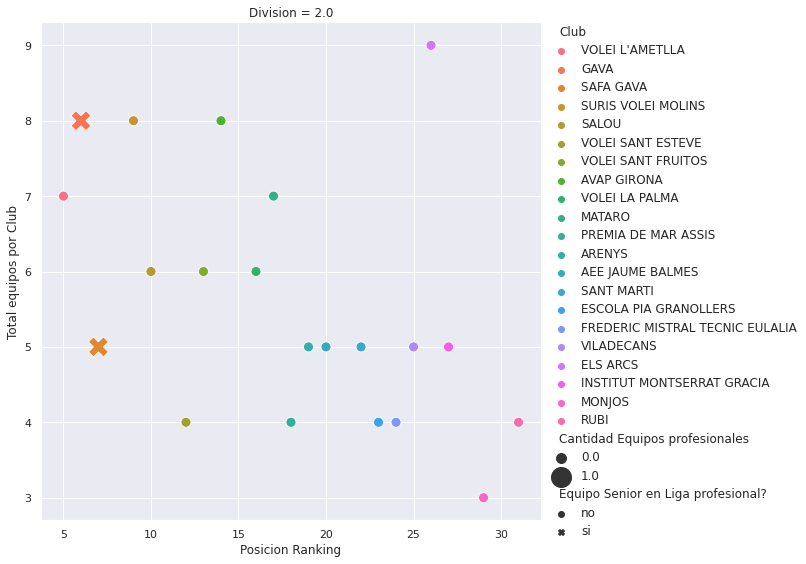

In [ ]:
# Ahora analizamos las diferentes variables pero en 2da division con las mismas visualizacion por variable con la posicion del ranking
sns.relplot(
    data=clubessegunda, x=clubessegunda["Posicion Ranking"], y=clubessegunda["Total equipos por Club"],kind="scatter",
    col=clubessegunda["Division"],hue=clubessegunda["Club"],style=clubessegunda["Equipo Senior en Liga profesional?"], # agregamos un estilo para diferenciar los clubes que tienen Equipo Senior Profesional
    size=clubessegunda["Cantidad Equipos profesionales"],sizes=(400,100),height=8) # agregamos una diferencia visual al hacer mas grandes los puntos de los equipos que tienen mas equipos Profesionales 
sns.color_palette("icefire", as_cmap=True) #agregamos una paletta de colores mas variada
plt.savefig("totalequipos_posranking_2da.png") # Salvamos la imagen de la visualizacion en un archivo png

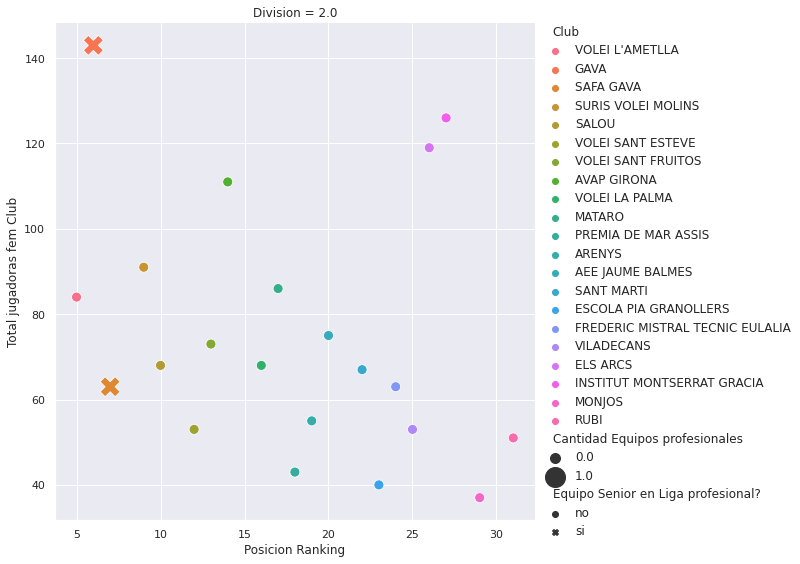

In [ ]:
sns.relplot(
    data=clubessegunda, x=clubessegunda["Posicion Ranking"], y=clubessegunda["Total jugadoras fem Club"],kind="scatter",
    col=clubessegunda["Division"],hue=clubessegunda["Club"],style=clubessegunda["Equipo Senior en Liga profesional?"], # agregamos un estilo para diferenciar los clubes que tienen Equipo Senior Profesional
    size=clubessegunda["Cantidad Equipos profesionales"],sizes=(400,100),height=8) # agregamos una diferencia visual al hacer mas grandes los puntos de los equipos que tienen mas equipos Profesionales 
sns.color_palette("icefire", as_cmap=True) #agregamos una paletta de colores mas variada
plt.savefig("totaljugadorasfemxclub_posranking_2da.png")

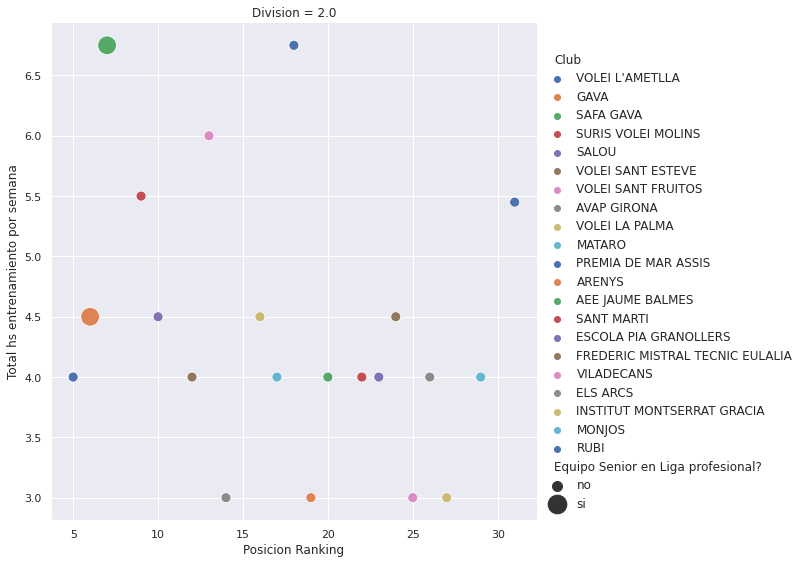

In [ ]:
sns.relplot(data=clubessegunda, x=clubessegunda["Posicion Ranking"], y=clubessegunda["Total hs entrenamiento por semana"],kind="scatter",
            col=clubessegunda["Division"],hue=clubessegunda["Club"],palette="deep",
            size=clubessegunda["Equipo Senior en Liga profesional?"],sizes=(350,100),hue_norm=(2, 100),height=8)
sns.color_palette("icefire", as_cmap=True) #agregamos una paletta de colores mas variada
plt.savefig("horas_entrenamiento_posranking_2da.png") # Salvamos la imagen de la visualizacion en un archivo png

In [ ]:
# Ahora vamos a obtener las medias y desvios de cada variable (poblacional y muestral)
p=clubespob['Club'].count()
n=clubes['Club'].count()

# Declaramos la variable de la confianza y la significación
confianza = 0.95
significacion = alfa = 1-confianza

# Calculamos los datos de la variable TOTAL EQUIPOS POR CLUB
desvpob_equipos=round(clubes["Total equipos por Club"].std(),2)
mediamuestra_equipos=clubesprimera['Total equipos por Club'].mean() + clubessegunda['Total equipos por Club'].mean()
desvmuestra_equipos=clubesprimera["Total equipos por Club"].std() + clubessegunda["Total equipos por Club"].std()

#cálculo de Zalfa2
zalfa2= abs(ss.norm.ppf(alfa/2))

# cálculamos el error típico
ErrorTipico_equipos = desvpob_equipos / math.sqrt(n)
MargenError_equipos = zalfa2 * ErrorTipico_equipos
print(f"El Margen de error del total de equipos por club es de {round(MargenError_equipos)} equipos")

A= mediamuestra_equipos - MargenError_equipos
B= mediamuestra_equipos + MargenError_equipos

print(f"El intervalo de error del total de equipos por club con un nivel de confianza del 95% es de {round(A)} - {round(B)} equipos")
print(p,n)

El Margen de error del total de equipos por club es de 1 equipos
El intervalo de error del total de equipos por club con un nivel de confianza del 95% es de 15 - 17 equipos
84 41


In [ ]:
# Calculamos los datos de la variable TOTAL JUGADORAS FEMENINAS POR CLUB
desvpobl_jugadoras = round(clubes["Total jugadoras fem Club"].std(),2)
mediamuestra_jugadoras = clubesprimera["Total jugadoras fem Club"].mean() + clubessegunda["Total jugadoras fem Club"].mean()
desvmuestra_jugadoras = clubesprimera["Total jugadoras fem Club"].std() + clubessegunda["Total jugadoras fem Club"].std()


# cálculamos el error típico
ErrorTipico_jugadoras = desvpobl_jugadoras /math.sqrt(n)
MargenError_jugadoras = zalfa2 * ErrorTipico_jugadoras
print(f"El Margen de error del total de jugadoras femeninas por club es de {round(MargenError_jugadoras)} jugadoras")


A= mediamuestra_jugadoras - MargenError_jugadoras
B= mediamuestra_jugadoras + MargenError_jugadoras

print(f"El intervalo de error del total de jugadoras femeninas por club con un nivel de confianza del 95% es de {round(A)} - {round(B)} jugadoras")

El Margen de error del total de jugadoras femeninas por club es de 16 jugadoras
El intervalo de error del total de jugadoras femeninas por club con un nivel de confianza del 95% es de 178 - 211 jugadoras


In [ ]:
# Calculamos los datos de la variable Total hs entrenamiento por semana
# aqui no tenemos la desviacion poblacion de la variable hs de entrenamiento por semana por club usamos la desviacion de la muestra
# utilizaremos el intervalo de confianza con la distribucion t-student con n-1 grados de libertad

mediamuestra_hsentren = clubesprimera["Total hs entrenamiento por semana"].mean() + clubessegunda["Total hs entrenamiento por semana"].mean()
desvmuestra_hsentren = clubesprimera["Total hs entrenamiento por semana"].std() + clubessegunda["Total hs entrenamiento por semana"].std()

# cálculamos el error típico
ErrorTipico_hsentren = desvmuestra_hsentren / math.sqrt(n)

# Ahora calcularemos el intervalo de confianza con la funcion correspondiente
interval_hs_entrenam=ss.t.interval(confianza, df = n-1, loc= mediamuestra_hsentren, scale= ErrorTipico_hsentren)

# Aqui separo las 2 variables en A y B para poder realizar un redondeo a 2 decimales
A,B=interval_hs_entrenam 

print(f"El intervalo de error del total de horas de entrenamiento por semana por club con un nivel de confianza del 95% es de {round(A,2)} - {round(B,2)} horas")

El intervalo de error del total de horas de entrenamiento por semana por club con un nivel de confianza del 95% es de 10.23 - 12.13 horas


In [ ]:
print(f"la media de la muestra del total de equipos por club es de {round(mediamuestra_equipos)}")
print(f"la media de la muestra del total jugadoras femeninos por club es de {round(mediamuestra_jugadoras)}")
print(f"la media de la muestra del total de horas de entrenamiento por semana por club es de {mediamuestra_hsentren}")

la media de la muestra del total de equipos por club es de 16
la media de la muestra del total jugadoras femeninos por club es de 195
la media de la muestra del total de horas de entrenamiento por semana por club es de 11.179880952380953


In [ ]:
print(f"El desvio estandar de la muestra del total de equipos por club es de {round(desvmuestra_equipos)}")
print(f"El desvio estandar de la muestra del total jugadoras femeninos por club es de {round(desvmuestra_jugadoras)}")
print(f"El desvio estandar de la muestra del total de horas de entrenamiento por semana por club es de {desvmuestra_hsentren}")

El desvio estandar de la muestra del total de equipos por club es de 7
El desvio estandar de la muestra del total jugadoras femeninos por club es de 92
El desvio estandar de la muestra del total de horas de entrenamiento por semana por club es de 3.008613539906575


In [ ]:
print(f"El desvio estandar de la poblacion del total de equipos por club es de {round(desvpob_equipos)}")
print(f"El desvio estandar de la poblacion del total jugadoras femeninos por club es de {round(desvpobl_jugadoras)}")

El desvio estandar de la poblacion del total de equipos por club es de 5
El desvio estandar de la poblacion del total jugadoras femeninos por club es de 53


In [ ]:
# ahora vamos a calcular cual hubiese sido realmente nuestra muestra para tener el 95% de confianza
# utilizamos el valor de confianza anterior del 95%

#cálculo de Zalfa2
zalfa2= abs(ss.norm.ppf(alfa/2))
MargenError_equipos = 1 # bajar el margen de error a 1
MargenError_jugadoras= 8 # bajar a la mitad el marge de error de la muestra

# calculamos la muestra (n) ideal para el 95% de confianza
n_ideal_equipos= (zalfa2 * desvpob_equipos / MargenError_equipos)**2
print(f"Para que nuestra estimacion de la media poblacion tenga un margen de error de 1 equipo necesitariamos una muestra de {n_ideal_equipos} clubes")

n_ideal_jugadoras = (zalfa2 * desvpobl_jugadoras / MargenError_jugadoras)**2
print(f"Para que nuestra estimacion de la media poblacion tenga un margen de error de 8 jugadoras necesitariamos una muestra de {n_ideal_jugadoras} clubes")



Para que nuestra estimacion de la media poblacion tenga un margen de error de 1 equipo necesitariamos una muestra de 79.87775813398534 clubes
Para que nuestra estimacion de la media poblacion tenga un margen de error de 8 jugadoras necesitariamos una muestra de 168.28605780042457 clubes
